# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
    - [Pitch Velocity by Pitch Number](#Pitch-Velocity-by-Pitch-Number)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Rate by Pitch Type](#Spin-Rate-by-Pitch-Type)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [Spin Axis](#Spin-Axis)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [HB & HB Due to Magnus Force](#Horizontal-&-Vertical-Break-Due-to-Magnus-Force-Axis)
    - [Release Position](#Release-Postion)
    - [Release Extension](#Release-Extension-(Side))
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Pitch Locations](#Pitch-Locations)
    - [Balls & Strikes - All-Pitches](#Balls-&-Strikes---All-Pitches)
    - [Pitch Location by Pitch Type](#Pitch-Location-by-Pitch-Type)
- [Heatmaps](#Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)

# Imports

In [1]:
import math
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
kershaw = pd.read_csv('../data/clayton-kershaw.csv')
kershaw.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(kershaw.shape)
kershaw.head(2)

(1806, 84)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Mx,Mz,phi,theta,is_strike,pitch_count,plate_-x,pfx_-x,M-x,spin_eff,spin_eff%,true_spin,bauer_units,swing_miss
0,SL,2021-05-30,87.5,1.6,6.13,"Kershaw, Clayton",592332,477132,strikeout,called_strike,8,Kevin Gausman called out on strikes.,L,L,LAD,SF,S,2.0,NaN,2,2,2021,-0.54,6.72,0.06,1.63,NaN,621453.0,643565.0,2,6,Top,NaN,NaN,605131,-2.598781,-127.404467,-5.940018,-5.419891,22.955682,-25.153982,3.55,1.61,NaN,NaN,NaN,87.8,2621.0,6.2,633923,54.30,NaN,NaN,0.0,1.0,0.0,0.0,NaN,46,5,Slider,0,5,5,0,Standard,Strategic,218.0,0.007,-0.391,NaN,NaN,NaN,NaN,1,2-2,-0.06,6.48,NaN,NaN,NaN,NaN,29.954286,0
1,FF,2021-05-30,90.4,1.6,6.12,"Kershaw, Clayton",592332,477132,NaN,called_strike,6,Kevin Gausman called out on strikes.,L,L,LAD,SF,S,NaN,NaN,2,1,2021,-0.08,17.88,0.61,2.56,NaN,621453.0,643565.0,2,6,Top,NaN,NaN,605131,-2.278670,-131.630744,-6.182461,-0.542745,23.603641,-13.761405,3.43,1.59,NaN,NaN,NaN,90.9,2462.0,6.2,633923,54.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,4,4-Seam Fastball,0,5,5,0,Standard,Strategic,178.0,0.000,-0.134,NaN,NaN,NaN,NaN,1,2-1,-0.61,0.96,NaN,NaN,NaN,NaN,27.234513,0


In [3]:
# kershaw.pitch_type.value_counts(normalize = True)
r_kershaw = kershaw.loc[(kershaw['player_name'] == 'Kershaw, Clayton') & (kershaw['stand'] == 'R')].copy()
l_kershaw = kershaw.loc[(kershaw['player_name'] == 'Kershaw, Clayton') & (kershaw['stand'] == 'L')].copy()
# all hitters
sl = kershaw.loc[kershaw['pitch_type'] == 'SL']
ff = kershaw.loc[kershaw['pitch_type'] == 'FF']
cu = kershaw.loc[kershaw['pitch_type'] == 'CU']
ch = kershaw.loc[kershaw['pitch_type'] == 'CH']
# RHH
r_sl = r_kershaw.loc[r_kershaw['pitch_type'] == 'SL']
r_ff = r_kershaw.loc[r_kershaw['pitch_type'] == 'FF'] 
r_cu = r_kershaw.loc[r_kershaw['pitch_type'] == 'CU']
r_ch = r_kershaw.loc[r_kershaw['pitch_type'] == 'CH']
# LHH
l_sl = l_kershaw.loc[l_kershaw['pitch_type'] == 'SL']
l_ff = l_kershaw.loc[l_kershaw['pitch_type'] == 'FF']
l_cu = l_kershaw.loc[l_kershaw['pitch_type'] == 'CU']
l_ch = l_kershaw.loc[l_kershaw['pitch_type'] == 'CH']
order = ['SL', 'FF', 'CU', 'CH']

# Pitcher Overview

### General Pitch Data

In [4]:
gen_pd = kershaw[['pitch_type', 'release_speed', 'release_spin_rate',
                  'true_spin', 'spin_eff', 'phi', 'pfx_z', 'pfx_-x',
                  'is_strike', 'release_pos_x', 'release_pos_z', 'bauer_units']]
col_dict = {
    'release_speed': 'velo', 'release_spin_rate': 'spin', 'phi': 'spin_axis', 'pfx_z': 'hb', 'pfx_-x': 'vb',
    'is_strike': 'strike', 'release_pos_z': 'r_height', 'release_pos_x': 'r_side'
}
gen_pd.rename(columns = col_dict, inplace = True)
gen_pd.groupby(['pitch_type'], sort = False).mean()

,velo,spin,true_spin,spin_eff,spin_axis,hb,vb,strike,r_side,r_height,bauer_units
pitch_type,,,,,,,,,,,
SL,87.075000,2654.045402,501.376237,0.192000,223.276316,8.182326,4.712372,0.734884,1.513756,6.232547,30.483694
FF,90.636707,2505.066566,1532.492784,0.624158,184.323024,19.353897,0.525861,0.641994,1.525317,6.194109,27.639920
CU,74.239927,2535.468864,1372.876019,0.558889,345.722222,-15.283516,4.782857,0.538462,1.178608,6.382308,34.145191
CH,87.045455,2163.272727,1684.480000,0.780000,137.363636,15.665455,-12.992727,0.272727,1.790909,6.067273,24.852211


### Pitch Usage

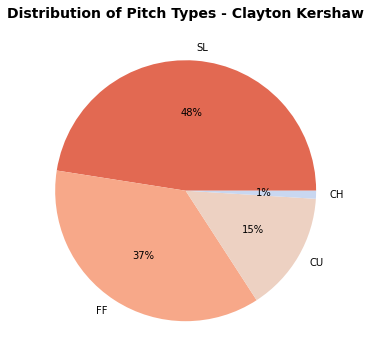

In [5]:
plt.figure(figsize = (8, 6))

dist = round(kershaw.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Clayton Kershaw', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

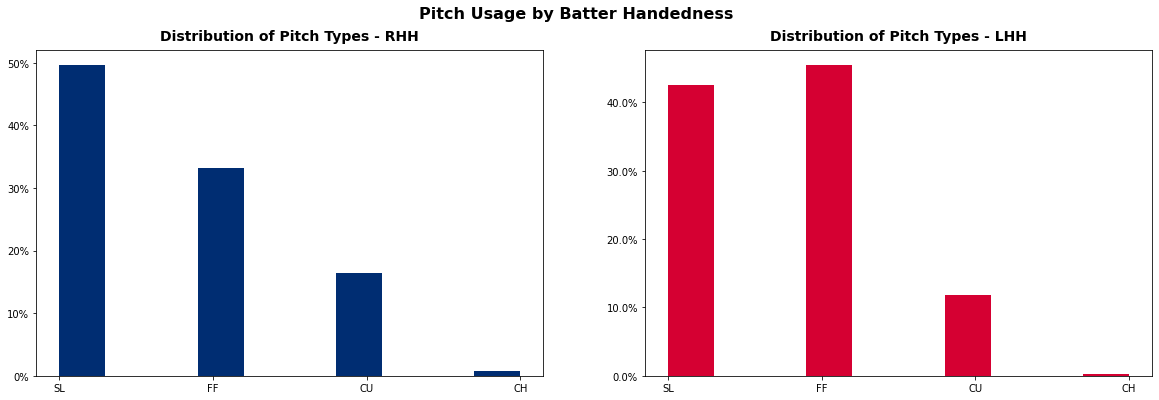

In [6]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_kershaw.pitch_type.sort_values(ascending = False)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_kershaw.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

Slider velo sits: 86 - 88 mph,  max: 90.5 mph
4-Seam velo sits: 90 - 91 mph,  max: 92.9 mph
Curve velo sits: 74 - 75 mph,  max: 77.1 mph
Changeup velo sits: 86 - 88 mph,  max: 89.3 mph


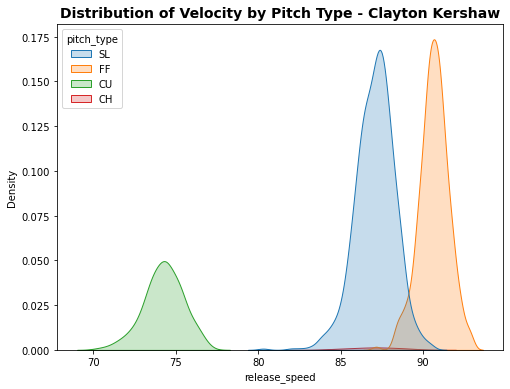

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = kershaw, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type - Clayton Kershaw', fontdict = font_title, pad = 12);
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ','max:',round(sl['release_speed'].max(),2),'mph')
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('Curve velo sits:',round(cu['release_speed'].quantile(.25)),'-',round(cu['release_speed'].quantile(.75)), 
      'mph, ','max:',round(cu['release_speed'].max(), 2),'mph')
print('Changeup velo sits:',round(ch['release_speed'].quantile(.25)),'-',round(ch['release_speed'].quantile(.75)),
      'mph, ','max:',round(ch['release_speed'].max(), 2),'mph')

### Pitch Velocity by Pitch Number

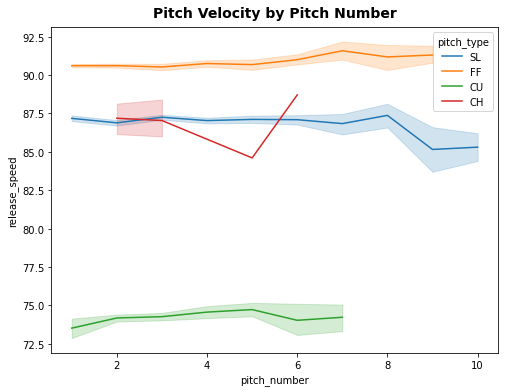

In [8]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = kershaw, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Rate by Pitch Type

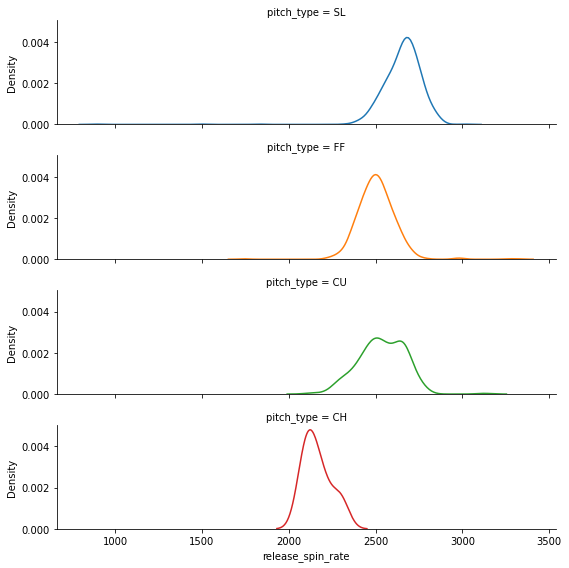

In [9]:
g = sns.FacetGrid(kershaw, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, );
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10');

In [10]:
#plt.figure(figsize = (8, 6))
#sns.stripplot(data = kershaw, x = 'release_spin_rate', y = 'pitch_type')
#sns.swarmplot(data = kershaw, x = 'release_spin_rate', y = 'pitch_type')
#plt.title('Spin Rate by Pitch Type', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

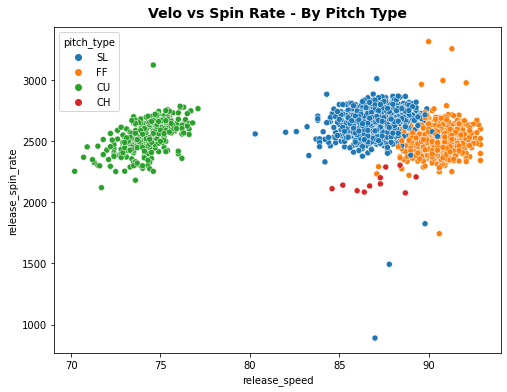

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Velo vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

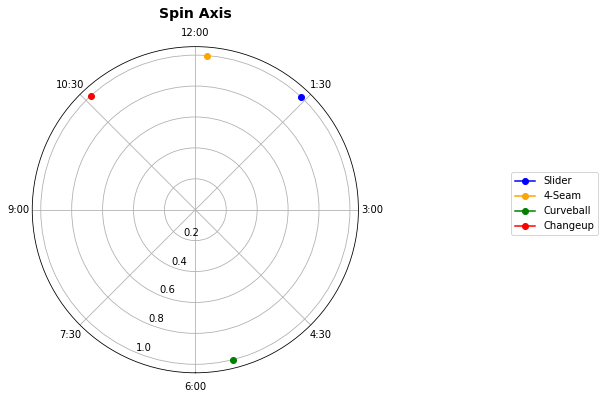

In [12]:
sl_tilt = sl['phi'].mean()
ff_tilt = ff['phi'].mean()
cu_tilt = cu['phi'].mean()
ch_tilt = ch['phi'].mean()
ax = plt.figure(figsize = (8, 6))
ax = plt.subplot(polar = True, theta_direction = -1)
ax.plot(math.radians(sl_tilt), 1, color = 'blue', marker = 'o', label = 'Slider')
ax.plot(math.radians(ff_tilt), 1, color = 'orange', marker = 'o', label = '4-Seam')
ax.plot(math.radians(cu_tilt), 1, color = 'green', marker = 'o', label = 'Curveball')
ax.plot(math.radians(ch_tilt), 1, color = 'red', marker = 'o', label = 'Changeup')
ticks = ['6:00', '7:30', '9:00', '10:30', '12:00', '1:30', '3:00', '4:30']
ax.set_xticklabels(ticks)        
ax.legend(bbox_to_anchor=(1.75, .63))
ax.set_theta_zero_location("S")
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Efficiency

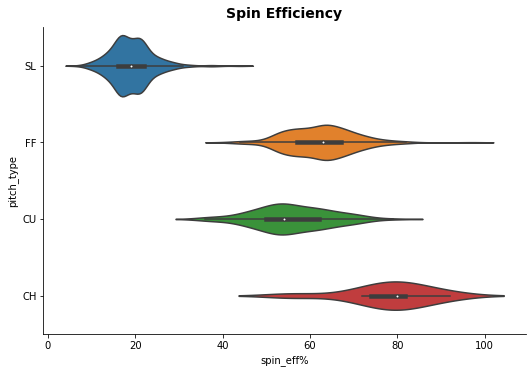

In [13]:
sns.catplot(data = kershaw, x = 'spin_eff%', y = 'pitch_type', kind = 'violin', aspect= 1.5, palette = 'tab10')
plt.title('Spin Efficiency', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

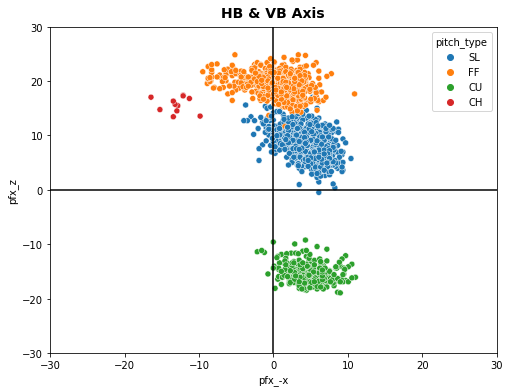

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

###  Horizontal & Vertical Break Due to Magnus Force Axis

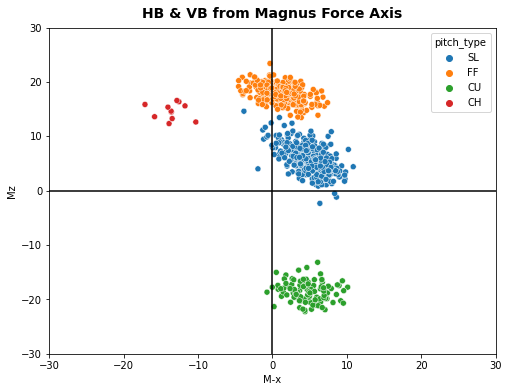

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'M-x', y = 'Mz', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB from Magnus Force Axis', fontdict = font_title, pad = 15);

### Release Postion

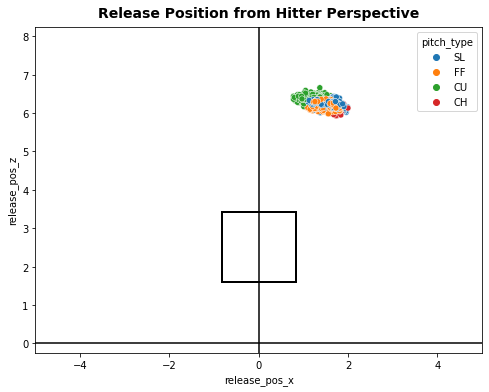

In [16]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.59, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Release Extension (Side)

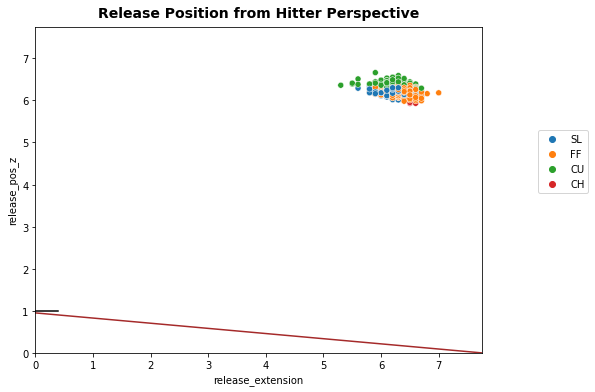

In [17]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_extension', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(0, 7.75), plt.ylim(0, 7.75)
plt.axline((0, .95), (7.75,0), color = 'brown'), plt.axhline(1, 0, .05, color = 'black')
plt.legend(bbox_to_anchor=(1.25, .7))
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Bauer Units

Slider Avg Bauer Units: 30.48
4-Seam Avg Bauer Units: 27.64
Curveball Avg Bauer Units: 34.15
Changeup Avg Bauer Units: 24.85


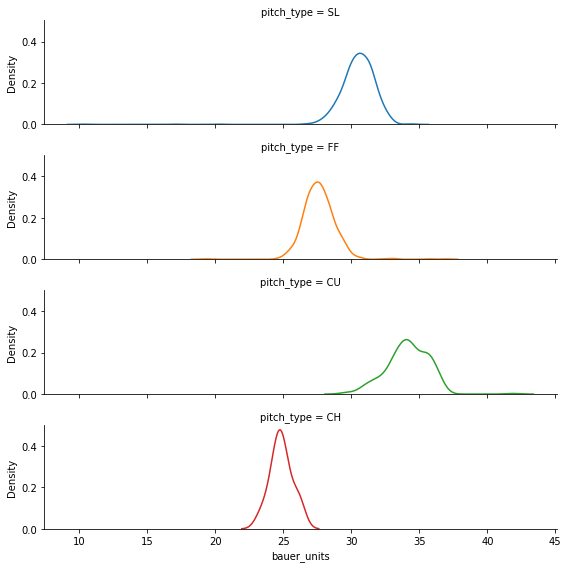

In [18]:
g = sns.FacetGrid(kershaw, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('Slider Avg Bauer Units:', round(sl['bauer_units'].mean(), 2))
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Curveball Avg Bauer Units:', round(cu['bauer_units'].mean(), 2))
print('Changeup Avg Bauer Units:', round(ch['bauer_units'].mean(), 2));

# Count Breakdown

### Pitch Usage by Count

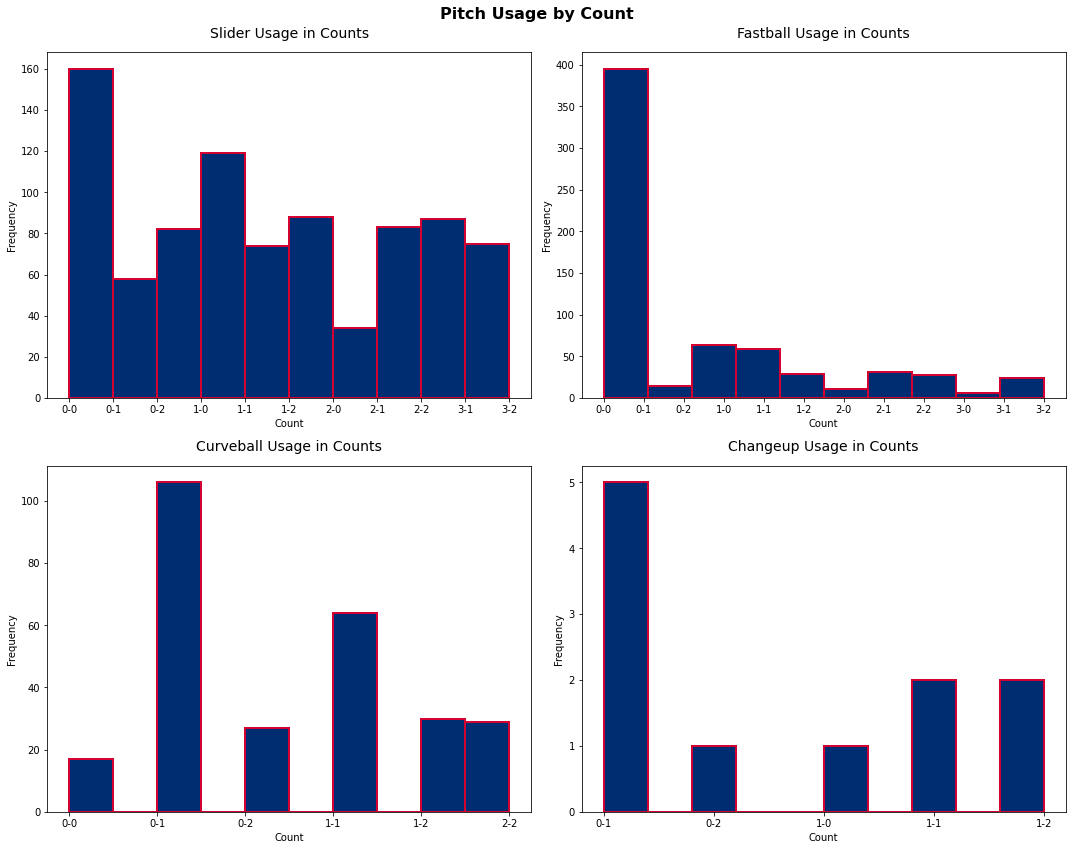

In [19]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Slider Usage in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Fastball Usage in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Curveball Usage in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Changeup Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Pitch-Locations
*All From Hitters' Perspective

### Balls & Strikes - All Pitches

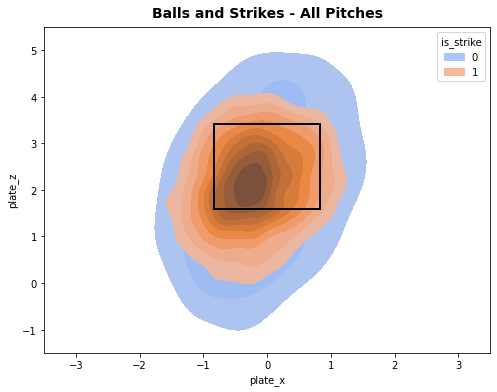

In [20]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kershaw, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', hue = 'is_strike')
rect = mpatches.Rectangle((left, bottom), width, height, fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5), plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

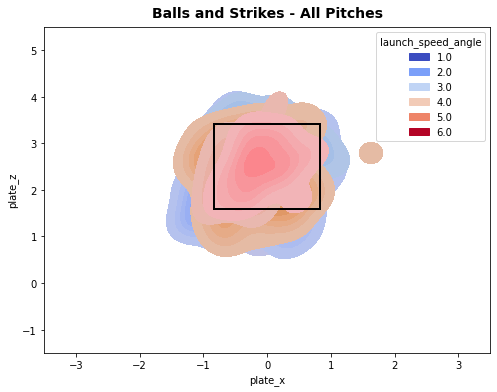

In [21]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kershaw, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', 
            hue = 'launch_speed_angle')
plt.gca().add_patch(Rectangle((left, bottom), width, height, fill = False, color = 'black', linewidth = 2))
plt.xlim(-3.5, 3.5), plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Pitch Location by Pitch Type

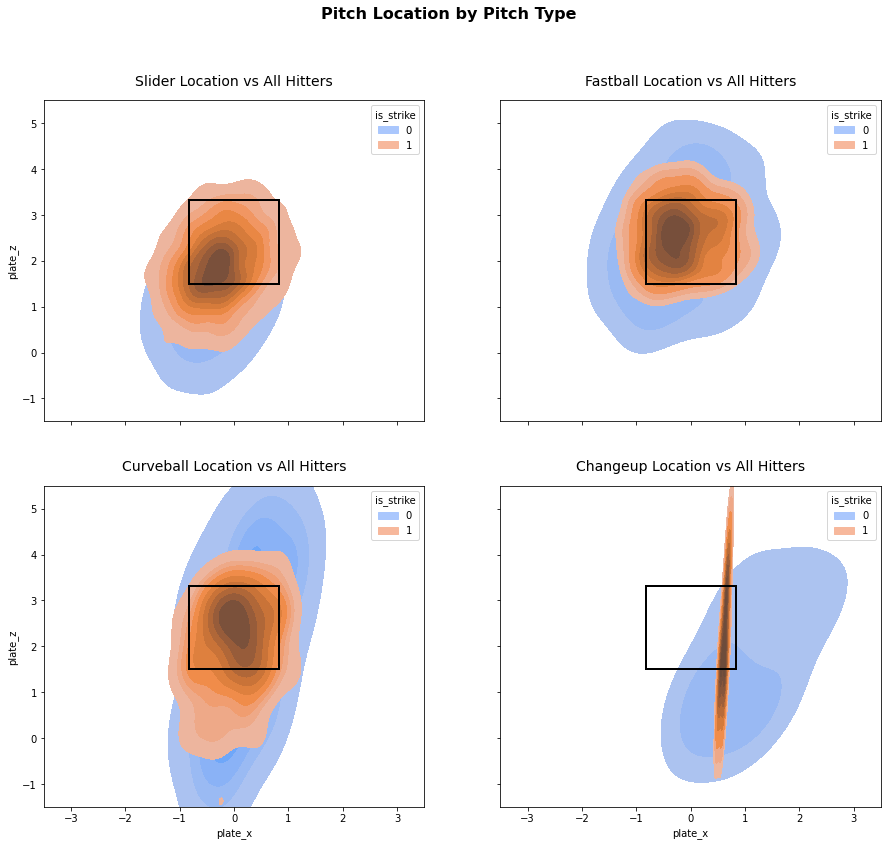

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (15, 13), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=ff,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Fastball Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball Location vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15);

### Launch Speed Angle
1: weak
2: topped
3: under
4: flare/burner
5: solid contact
6: barrel

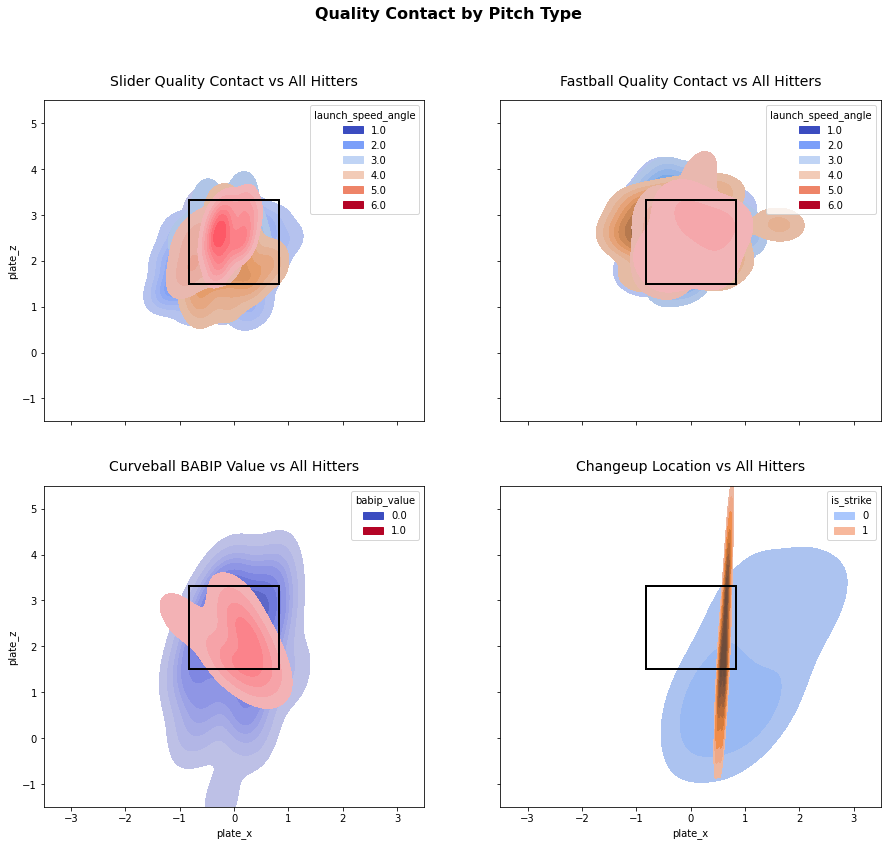

In [23]:
fig, axs = plt.subplots(2, 2, figsize = (15, 13), sharex = True, sharey = True)
fig.suptitle('Quality Contact by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax=axs[0][0],data=sl,x='plate_x',y='plate_z',fill=True,hue='launch_speed_angle',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Slider Quality Contact vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[0][1],data=ff,x='plate_x',y='plate_z',fill = True,hue='launch_speed_angle',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Fastball Quality Contact vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[1][0],data=cu,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball BABIP Value vs All Hitters', fontsize = 14, pad = 15)
sns.kdeplot(ax=axs[1][1],data=ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15);

# Heatmaps

### Slider Heatmaps

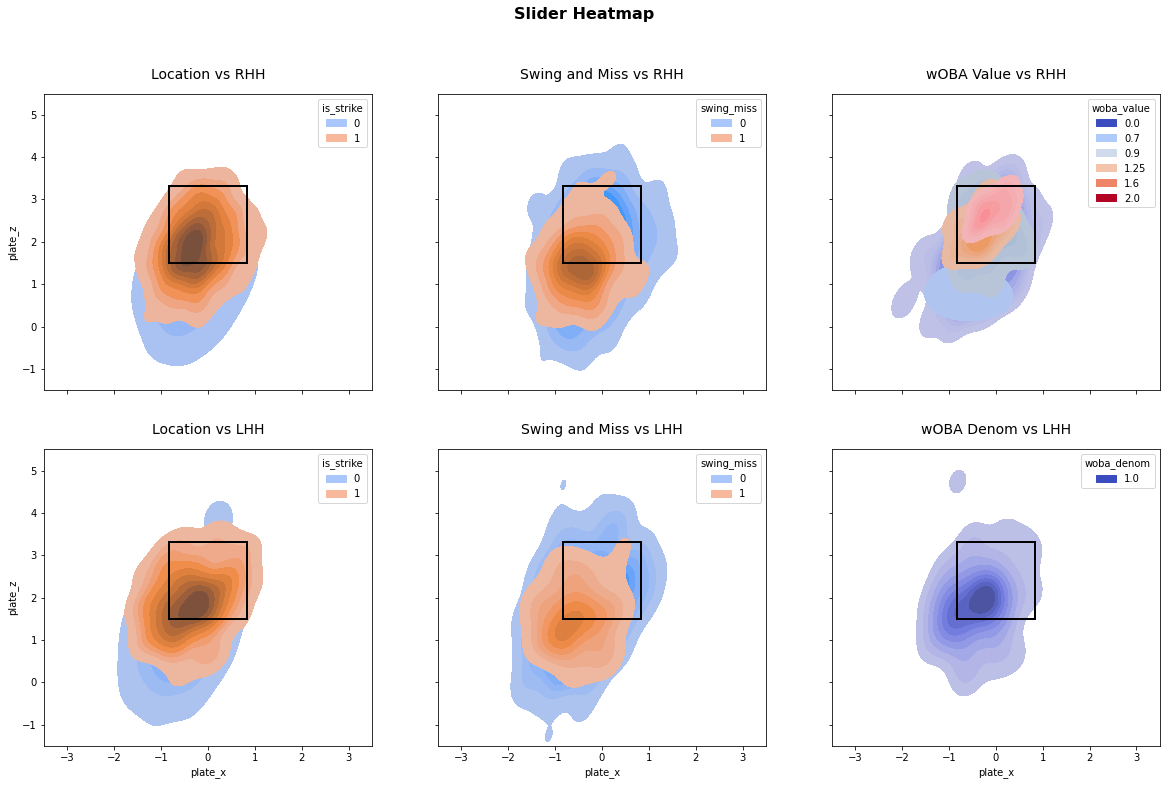

In [24]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_sl,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Denom vs LHH', fontsize = 14, pad = 15);

### Fastball Heatmaps

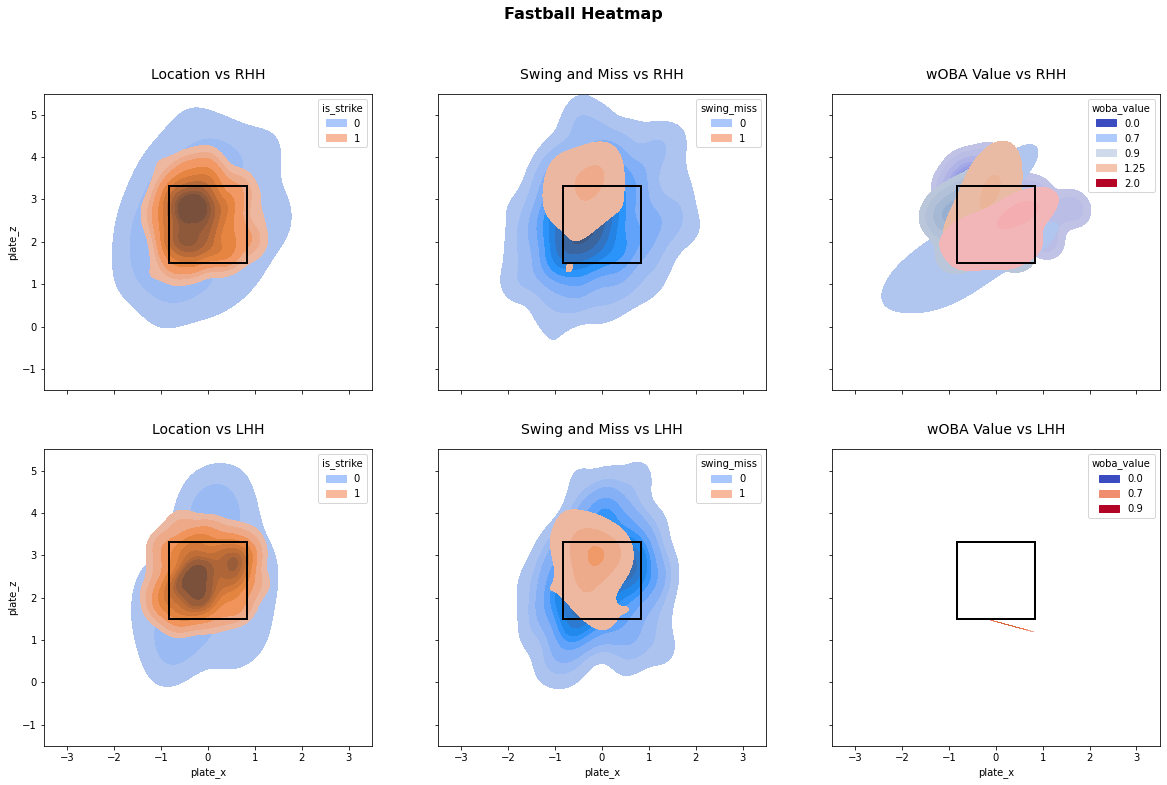

In [25]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);

### Curveball Heatmaps

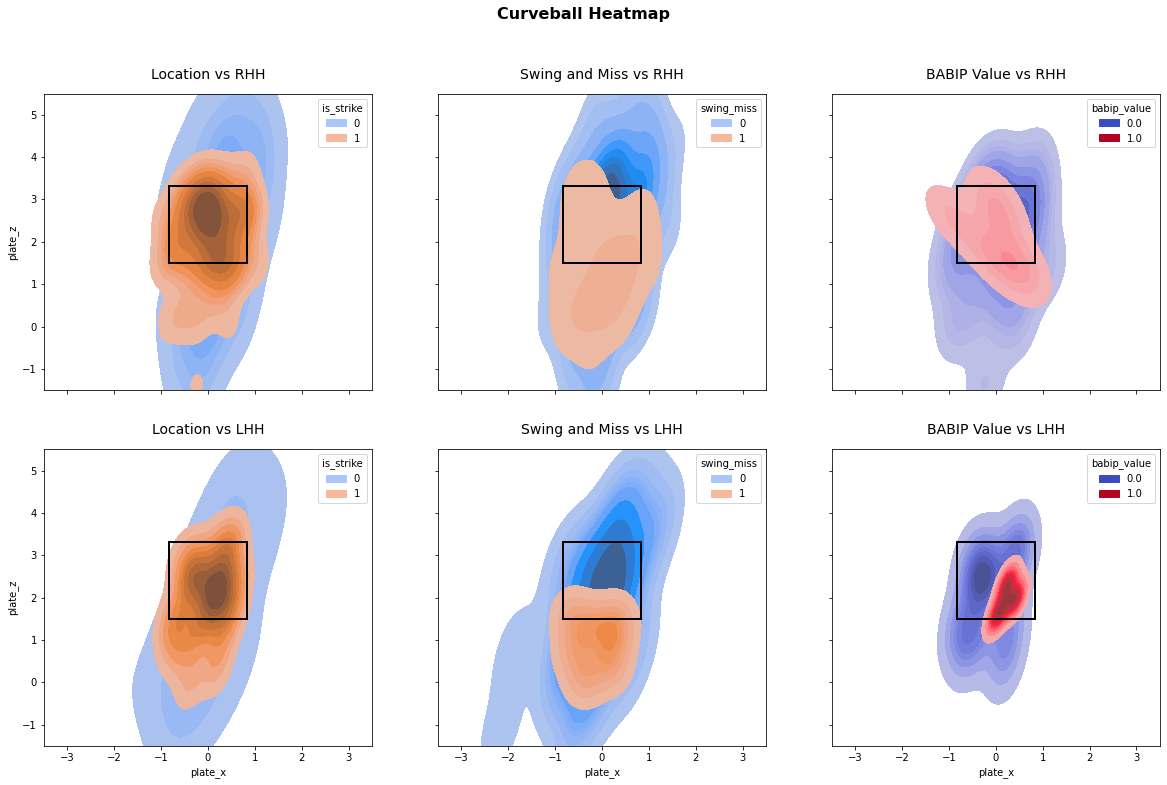

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_cu,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('BABIP Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_cu,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 14, pad = 15);

### Changeup Heatmaps

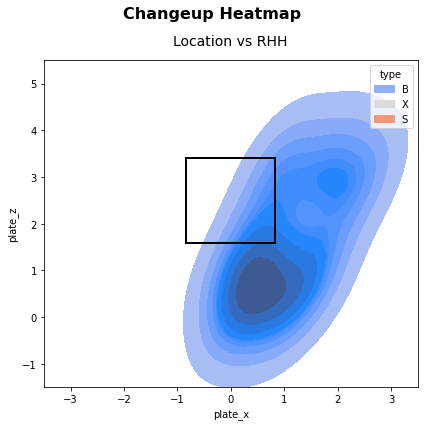

In [27]:
plt.figure(figsize = (6, 6))

sns.kdeplot(data = r_ch, x = 'plate_x', y = 'plate_z', fill = True, hue = 'type', palette='coolwarm')
plt.gca().add_patch(Rectangle((left, bottom), width, height, fill = False, color = 'black', linewidth = 2))
plt.xlim(-3.5, 3.5), plt.ylim(-1.5, 5.5)
plt.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.title('Location vs RHH', fontsize = 14, pad = 15)
plt.tight_layout();